# Black-Scholes Risk Analysis - Demonstração

Este notebook demonstra como usar as funções criadas para análise de risco de opções usando o modelo de Black-Scholes.

In [1]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from simulator import OptionSimulator

## 1. Configuração dos Parâmetros

In [2]:
# Parâmetros da simulação
ticker = "PETR4.SA"
start_date = "2023-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Caminhos para os dados
raw_path = "../data/raw"
processed_path = "../data/processed"
exports_path = "../data/exports"

## 2. Executando a Simulação

In [3]:
# Criar o simulador
simulator = OptionSimulator(ticker, start_date, end_date, raw_path, processed_path, exports_path)

# Executar a simulação
df_results = simulator.load_and_process_data()

print(f"Dados processados: {len(df_results)} registros")
print(f"Volatilidade anualizada: {simulator.sigma:.4f}")
df_results.head()

/home/ubuntu/black-scholes-risk-app/notebooks/../src/data_loader.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Baixando dados para PETR4.SA...


Colunas do DataFrame baixado: MultiIndex([( 'Close', 'PETR4.SA'),
            (  'High', 'PETR4.SA'),
            (   'Low', 'PETR4.SA'),
            (  'Open', 'PETR4.SA'),
            ('Volume', 'PETR4.SA')],
           names=['Price', 'Ticker'])
Dados brutos de PETR4.SA salvos em ../data/raw/PETR4_raw_data.csv
Colunas do DataFrame raw: MultiIndex([( 'Close', 'PETR4.SA'),
            (  'High', 'PETR4.SA'),
            (   'Low', 'PETR4.SA'),
            (  'Open', 'PETR4.SA'),
            ('Volume', 'PETR4.SA')],
           names=['Price', 'Ticker'])
Volatilidade anualizada calculada: 0.2773


DataFrame salvo em ../data/processed/PETR4_processed_data.csv
Dados processados salvos em ../data/processed/PETR4_processed_data.csv
DataFrame salvo em ../data/exports/PETR4_options_data.csv
Dados para exportação salvos em ../data/exports/PETR4_options_data.csv
Dados processados: 647 registros
Volatilidade anualizada: 0.2773


,Date,Stock_Price,Strike_Price,Time_to_Maturity_Years,Risk_Free_Rate,Volatility,Call_Price,Put_Price,Delta_Call,Delta_Put,Gamma,Vega,Theta_Call,Theta_Put,Rho_Call,Rho_Put
0,2023-01-02,13.684306,14.368521,0.246575,0.11,0.277264,0.618759,0.918490,0.464727,-0.535273,0.210919,2.700261,-2.149646,-0.611402,1.415516,-2.032603
1,2023-01-03,13.338024,14.004925,0.246575,0.11,0.277264,0.603101,0.895248,0.464727,-0.535273,0.216395,2.631930,-2.095249,-0.595930,1.379696,-1.981168
2,2023-01-04,13.761925,14.450021,0.246575,0.11,0.277264,0.622269,0.923700,0.464727,-0.535273,0.209730,2.715577,-2.161839,-0.614870,1.423545,-2.044132
3,2023-01-05,14.257475,14.970349,0.246575,0.11,0.277264,0.644676,0.956961,0.464727,-0.535273,0.202440,2.813361,-2.239684,-0.637010,1.474805,-2.117739
4,2023-01-06,14.173889,14.882584,0.246575,0.11,0.277264,0.640896,0.951351,0.464727,-0.535273,0.203634,2.796868,-2.226554,-0.633276,1.466159,-2.105323


## 3. Análise dos Resultados

In [4]:
# Estatísticas descritivas
print("Estatísticas dos preços das opções:")
print(df_results[['Call_Price', 'Put_Price']].describe())

Estatísticas dos preços das opções:
       Call_Price   Put_Price
count  647.000000  647.000000
mean     1.253755    1.861084
std      0.296183    0.439656
min      0.603101    0.895248
25%      1.074874    1.595551
50%      1.373881    2.039400
75%      1.470306    2.182533
max      1.649135    2.447989


## 4. Visualizações

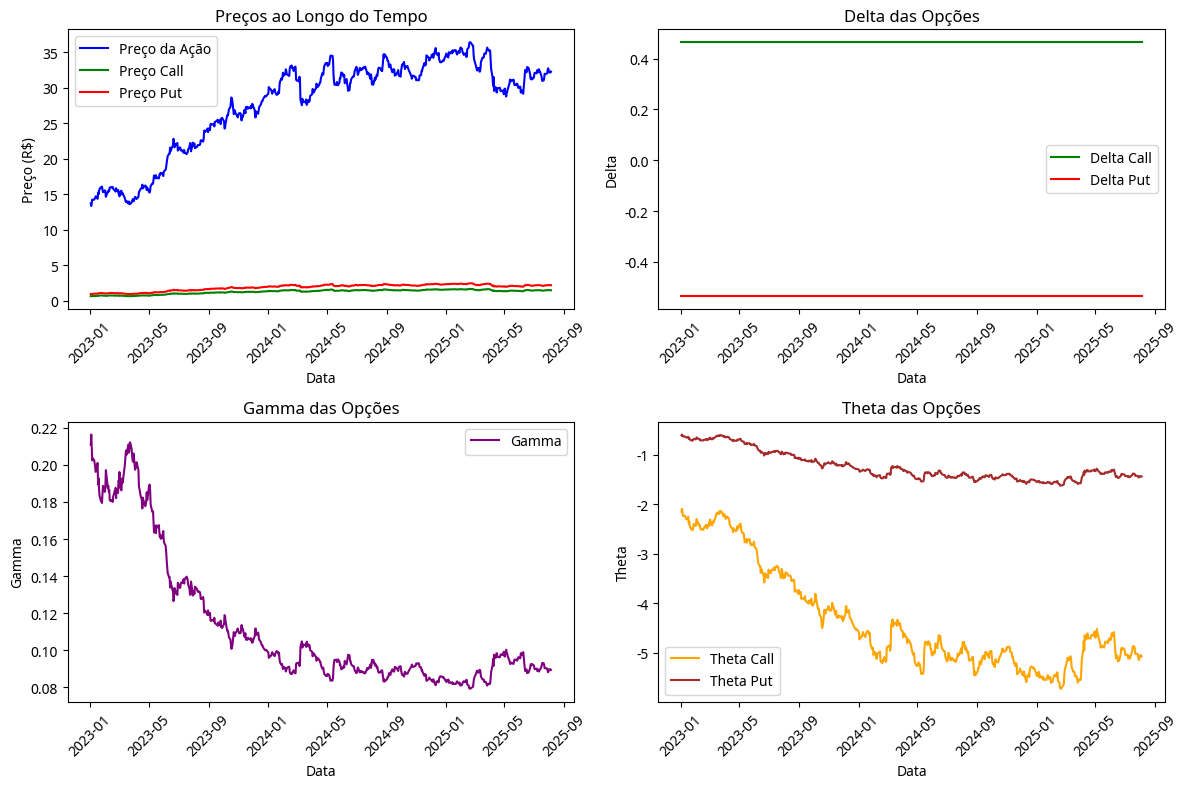

In [5]:
# Converter a coluna Date para datetime
df_results['Date'] = pd.to_datetime(df_results['Date'])

# Gráfico 1: Preços das opções ao longo do tempo
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_results['Date'], df_results['Stock_Price'], label='Preço da Ação', color='blue')
plt.plot(df_results['Date'], df_results['Call_Price'], label='Preço Call', color='green')
plt.plot(df_results['Date'], df_results['Put_Price'], label='Preço Put', color='red')
plt.title('Preços ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.xticks(rotation=45)

# Gráfico 2: Delta das opções
plt.subplot(2, 2, 2)
plt.plot(df_results['Date'], df_results['Delta_Call'], label='Delta Call', color='green')
plt.plot(df_results['Date'], df_results['Delta_Put'], label='Delta Put', color='red')
plt.title('Delta das Opções')
plt.xlabel('Data')
plt.ylabel('Delta')
plt.legend()
plt.xticks(rotation=45)

# Gráfico 3: Gamma e Vega
plt.subplot(2, 2, 3)
plt.plot(df_results['Date'], df_results['Gamma'], label='Gamma', color='purple')
plt.title('Gamma das Opções')
plt.xlabel('Data')
plt.ylabel('Gamma')
plt.legend()
plt.xticks(rotation=45)

# Gráfico 4: Theta
plt.subplot(2, 2, 4)
plt.plot(df_results['Date'], df_results['Theta_Call'], label='Theta Call', color='orange')
plt.plot(df_results['Date'], df_results['Theta_Put'], label='Theta Put', color='brown')
plt.title('Theta das Opções')
plt.xlabel('Data')
plt.ylabel('Theta')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../reports/options_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Exportação para Power BI

In [6]:
# Verificar se os dados foram exportados corretamente
export_file = f"../data/exports/{ticker.replace('.SA', '')}_options_data.csv"
if os.path.exists(export_file):
    print(f"✅ Arquivo exportado com sucesso: {export_file}")
    print(f"Tamanho do arquivo: {os.path.getsize(export_file)} bytes")
else:
    print("❌ Erro na exportação do arquivo")

✅ Arquivo exportado com sucesso: ../data/exports/PETR4_options_data.csv
Tamanho do arquivo: 183217 bytes


## 6. Resumo dos Resultados

In [7]:
print("=== RESUMO DA ANÁLISE ===")
print(f"Ticker analisado: {ticker}")
print(f"Período: {start_date} a {end_date}")
print(f"Total de observações: {len(df_results)}")
print(f"Volatilidade anualizada: {simulator.sigma:.2%}")
print(f"Taxa de juros utilizada: {simulator.r:.2%}")
print(f"Prazo das opções: {simulator.maturity_days} dias")
print("\nPreços médios das opções:")
print(f"Call: R$ {df_results['Call_Price'].mean():.2f}")
print(f"Put: R$ {df_results['Put_Price'].mean():.2f}")
print("\nGregas médias:")
print(f"Delta Call: {df_results['Delta_Call'].mean():.4f}")
print(f"Delta Put: {df_results['Delta_Put'].mean():.4f}")
print(f"Gamma: {df_results['Gamma'].mean():.6f}")
print(f"Vega: {df_results['Vega'].mean():.4f}")

=== RESUMO DA ANÁLISE ===
Ticker analisado: PETR4.SA
Período: 2023-01-01 a 2025-08-06
Total de observações: 647
Volatilidade anualizada: 27.73%
Taxa de juros utilizada: 11.00%
Prazo das opções: 90 dias

Preços médios das opções:
Call: R$ 1.25
Put: R$ 1.86

Gregas médias:
Delta Call: 0.4647
Delta Put: -0.5353
Gamma: 0.112447
Vega: 5.4714
